In [1]:
from dataset_utils import map_variable, validate_variable, plot_weight_agg_over_time


In [7]:
raw_2024["V242516"]
raw_2024[raw_2024["V242516"] > 100]["V242516"].value_counts()

Series([], Name: count, dtype: int64)

In [2]:
import pandas as pd
raw_2024_path = "raw/anes_timeseries_2024_csv_20250808.csv"
raw_2024 = pd.read_csv(raw_2024_path)
raw_2024 = raw_2024[raw_2024["V240107b"] != " "]
df = raw_2024[[]].copy()
df["year"] = 2024
df["weight"] = map_variable(raw_2024["V240107b"], type_check=float)
validate_variable(df["weight"], lambda x: x >= 0)
df["age"] = map_variable(raw_2024["V241458x"], nulls=[-2])
validate_variable(df["age"], lambda x: x >= 0 and x <= 120)
df["female"] = map_variable(raw_2024["V241550"], nulls =[3,0,-9], mapping={1:0,2:1})
validate_variable(df["female"], [0,1])
df["race"] = map_variable(raw_2024["V241501x"], type_check=str, mapping={1:"White",2:"Black",3:"Hispanic",4:"Other",5:"Other",6:"Other"}, nulls=[-4,-8,-9])         
validate_variable(df["race"], ["White","Black","Hispanic","Other"])
df["strong_republican"] = map_variable(raw_2024["V241227x"], mapping={1:0,2:0,3:0,4:0,5:0,6:0,7:1})
validate_variable(df["strong_republican"], [0,1])
df["republican"] = map_variable(raw_2024["V241227x"], mapping={1:0,2:0,3:0,4:0,5:0,6:1,7:1})
validate_variable(df["republican"], [0,1])
df["lean_republican"] = map_variable(raw_2024["V241227x"], mapping={1:0,2:0,3:0,4:0,5:1,6:1,7:1})
validate_variable(df["lean_republican"], [0,1])
df["strong_democrat"] = map_variable(raw_2024["V241227x"], mapping={1:1,2:0,3:0,4:0,5:0,6:0,7:0})
validate_variable(df["strong_democrat"], [0,1])
df["democrat"] = map_variable(raw_2024["V241227x"], mapping={1:1,2:0,3:0,4:0,5:0,6:0,7:0})
validate_variable(df["democrat"], [0,1])
df["lean_democrat"] = map_variable(raw_2024["V241227x"], mapping={1:1,2:1,3:1,4:0,5:0,6:0,7:0})
validate_variable(df["lean_democrat"], [0,1])
df["party_3_narrow"] = map_variable(raw_2024["V241227x"], mapping={1:"D",2:"D",3:"I",4:"I",5:"I",6:"R",7:"R"}, type_check=str)
validate_variable(df["party_3_narrow"], ["D","I","R"])
df["party_3_broad"] = map_variable(raw_2024["V241227x"], mapping={1:"D",2:"D",3:"D",4:"I",5:"R",6:"R",7:"R"}, type_check=str)
validate_variable(df["party_3_broad"], ["D","I","R"])
df["conservative"] = map_variable(raw_2024["V241177"], mapping={1:1,2:1,3:1,4:0,5:0,6:0,7:0})
validate_variable(df["conservative"], [0,1])
df["vote_rep_pres"] = map_variable(raw_2024["V242067"], mapping={1:1,2:0})
validate_variable(df["vote_rep_pres"], [0,1])
df["prev_rep_pres"] = map_variable(raw_2024["V241104"], mapping={1:1,2:0})
validate_variable(df["prev_rep_pres"], [0,1])
df["blacks_lazy"] = map_variable(raw_2024["V242542"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["blacks_lazy"], [1,2,3,4,5,6,7])
df["therm_blacks"] = map_variable(raw_2024["V242543"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["therm_blacks"], range(100+1))
df["therm_whites"] = map_variable(raw_2024["V242544"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["therm_whites"], range(100+1))
df["therm_trans"] = map_variable(raw_2024["V242545"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["therm_trans"], range(100+1))
df["therm_police"] = map_variable(raw_2024["V242546"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["therm_police"], range(100+1))
df["anti_imm"] = map_variable(raw_2024["V242547"], nulls=[-1,-5,-6,-7,-9])
validate_variable(df["anti_imm"], [1,2,3,4,5,6,7])
df["college"] = map_variable(raw_2024["V242548"], mapping = {4: 1, 5: 1, 1: 0, 2: 0, 3: 0})
validate_variable(df["college"], [0,1])
df["no_guar_jobs"] = map_variable(raw_2024["V242549"], nulls = [-1,-5,-6,-7,-9])
validate_variable(df["no_guar_jobs"], range(1,7+1))
#df["distrust_5pt"] = map_variable(raw_2024["V242550"], nulls=[-1, -5, -6, -7, -9])
#validate_variable(df["distrust_5pt"], [1,2,3,4,5])
df["therm_delta"] = df.apply(lambda row: row["therm_whites"] - row["therm_blacks"], axis=1)
df["age_group"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["age"]) else
    "18-29" if 18 <= int(row["age"]) <= 29 else
    "30-44" if 30 <= int(row["age"]) <= 44 else
    "45-64" if 45 <= int(row["age"]) <= 64 else
    "65+" if int(row["age"]) >= 65 else
    pd.NA
), axis=1)
validate_variable(df["age_group"], ["18-29","30-44","45-64","65+"])
df["resentment"] = raw_2024.apply(lambda row: (
    pd.NA if row["V242300"] < 0 or row ["V242301"] < 0 or row["V242302"] < 0 or row["V242303"] < 0 else # this are the missings
    int(-row["V242300"]) + int(row["V242301"]) + int(row["V242302"]) - int(row["V242303"])#+ 12 # if you want a 4-20 scale.
    # wait did they reverse the coding in 2024?
), axis=1) 
validate_variable(df["resentment"], lambda x: -8 <= x <= +8) 
df["race_edu_block"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["college"]) or pd.isna(row["race"]) else
    "NonWhite" if row["race"] in ("Black","Hispanic","Other") else
    "WhiteCollege" if row["race"] == "White" and row["college"] == 1 else
    "WhiteNonCollege" if row["race"] == "White" and row["college"] == 0 else
    pd.NA
), axis=1)
df["race_party_block"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["race"]) or pd.isna(row["republican"]) or pd.isna(row["democrat"]) else
    "WhiteRep" if row["race"] == "White" and row["republican"] == 1 else
    "WhiteDem" if row["race"] == "White" and row["democrat"] == 1 else
    "WhiteInd" if row["race"] == "White" else
    "NonWhite" if row["race"] in ("Black","Hispanic","Other") else
    pd.NA
), axis=1)
df["vote_prev_vote"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["prev_rep_pres"]) or pd.isna(row["vote_rep_pres"]) else
    "Rep-Rep" if row["prev_rep_pres"] == 1 and row["vote_rep_pres"] == 1 else
    "Rep-Dem" if row["prev_rep_pres"] == 1 and row["vote_rep_pres"] == 0 else
    "Dem-Rep" if row["prev_rep_pres"] == 0 and row["vote_rep_pres"] == 1 else
    "Dem-Dem" if row["prev_rep_pres"] == 0 and row["vote_rep_pres"] == 0 else
    pd.NA
), axis=1)
data_2024 = df.copy()
data_2024

/tmp/ipykernel_1672602/2435828784.py:3: DtypeWarning: Columns (8,10,11,16,18,19,20,22,23,24,26,27,28,30,31,36,38,39,1448,1449,1450,1451,1452,1455,1456,1457,1458,1459,1463,1464,1465) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_2024 = pd.read_csv(raw_2024_path)


,year,weight,age,female,race,strong_republican,republican,lean_republican,strong_democrat,democrat,...,therm_police,anti_imm,college,no_guar_jobs,therm_delta,age_group,resentment,race_edu_block,race_party_block,vote_prev_vote
0,2024,0.710865,50,0,Hispanic,1,1,1,0,0,...,6,4,0,5,-2,45-64,8,NonWhite,NonWhite,Dem-Dem
1,2024,2.383786,41,1,Other,0,0,0,0,0,...,4,4,1,4,0,30-44,4,NonWhite,NonWhite,<NA>
2,2024,0.808992,44,1,White,0,0,0,1,1,...,2,2,0,2,0,30-44,-8,WhiteNonCollege,WhiteDem,Rep-Rep
3,2024,0.291740,45,0,Other,0,1,1,0,0,...,4,4,0,4,0,45-64,2,NonWhite,NonWhite,<NA>
4,2024,0.222012,80,0,White,0,0,1,0,0,...,6,3,0,5,1,65+,4,WhiteNonCollege,WhiteInd,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,2024,0.554677,42,1,White,0,0,1,0,0,...,3,3,0,3,0,30-44,7,WhiteNonCollege,WhiteInd,<NA>
5515,2024,0.075758,80,1,Hispanic,0,0,0,0,0,...,4,4,1,2,-1,65+,-2,NonWhite,NonWhite,Rep-Rep
5517,2024,1.797863,69,1,White,0,0,0,0,0,...,4,4,1,3,0,65+,3,WhiteCollege,WhiteInd,Rep-Rep
5519,2024,2.255936,28,0,Black,0,0,0,1,1,...,4,1,0,1,-2,18-29,-8,NonWhite,NonWhite,Rep-Rep


In [5]:
raw_cdf_path = "raw/anes_timeseries_cdf_csv_20220916.csv"
raw_cdf = pd.read_csv(raw_cdf_path)
df = raw_cdf[[]].copy()
df["year"] = raw_cdf["VCF0004"]
df["weight"] = map_variable(raw_cdf["VCF0009z"], type_check=float)
validate_variable(df["weight"], lambda x: x >= 0)
df["age"] = map_variable(raw_cdf["VCF0101"], nulls=[-2])
validate_variable(df["age"], lambda x: x >= 0 and x <= 120)
df["female"] = map_variable(raw_cdf["VCF0104"], nulls =[3,0,-9], mapping={1:0,2:1})
validate_variable(df["female"], lambda x: x in [0, 1])
df["race"] = map_variable(raw_cdf["VCF0105a"], type_check=str, mapping={1:"White",2:"Black",5:"Hispanic",3:"Other",4:"Other",6:"Other"}, nulls=[-4,-8,-9])
validate_variable(df["race"], lambda x: x in ["White", "Black", "Hispanic", "Other"])
df["strong_republican"] = map_variable(raw_cdf["VCF0301"], mapping={1:0,2:0,3:0,4:0,5:0,6:0,7:1})
validate_variable(df["strong_republican"], lambda x: x in [0, 1])
df["republican"] = map_variable(raw_cdf["VCF0301"], mapping={1:0,2:0,3:0,4:0,5:0,6:1,7:1})
validate_variable(df["republican"], lambda x: x in [0, 1])
df["lean_republican"] = map_variable(raw_cdf["VCF0301"], mapping={1:0,2:0,3:0,4:0,5:1,6:1,7:1})
validate_variable(df["lean_republican"], lambda x: x in [0, 1])
df["strong_democrat"] = map_variable(raw_cdf["VCF0301"], mapping={1:1,2:0,3:0,4:0,5:0,6:0,7:0})
validate_variable(df["strong_democrat"], lambda x: x in [0, 1])
df["democrat"] = map_variable(raw_cdf["VCF0301"], mapping={1:1,2:0,3:0,4:0,5:0,6:0,7:0})
validate_variable(df["democrat"], lambda x: x in [0, 1])
df["lean_democrat"] = map_variable(raw_cdf["VCF0301"], mapping={1:1,2:1,3:1,4:0,5:0,6:0,7:0})
validate_variable(df["lean_democrat"], lambda x: x in [0, 1])
df["party_3_narrow"] = map_variable(raw_cdf["VCF0301"], mapping={1:"D",2:"D",3:"I",4:"I",5:"I",6:"R",7:"R"}, type_check=str)
validate_variable(df["party_3_narrow"], lambda x: x in ["D", "I", "R"])
df["party_3_broad"] = map_variable(raw_cdf["VCF0301"], mapping={1:"D",2:"D",3:"D",4:"I",5:"R",6:"R",7:"R"}, type_check=str)
validate_variable(df["party_3_broad"], lambda x: x in ["D", "I", "R"])
df["conservative"] = map_variable(raw_cdf["VCF0803"], mapping={1:0,2:0,3:0,4:0,5:0,6:1,7:1})
validate_variable(df["conservative"], lambda x: x in [0, 1])
df["therm_blacks"] = map_variable(raw_cdf["VCF0206"], nulls=[98,99])
validate_variable(df["therm_blacks"], range(0,101))
df["therm_whites"] = map_variable(raw_cdf["VCF0207"], nulls=[98,99])
validate_variable(df["therm_whites"], range(0,101))
df["therm_police"] = map_variable(raw_cdf["VCF0214"], nulls=[98,99])
validate_variable(df["therm_police"], range(0,101))
df["college"] = map_variable(raw_cdf["VCF0110"], mapping = {4: 1, 1: 0, 2: 0, 3:0})
validate_variable(df["college"], lambda x: x in [0, 1])
df["anti_imm"] = map_variable(raw_cdf["VCF0879"], nulls=[8,9,"8","9"])
validate_variable(df["anti_imm"], [1,2,3,4,5,6,7])
df["no_guar_jobs"] = map_variable(raw_cdf["VCF0809"], nulls = [0,9,"0","9"])
validate_variable(df["no_guar_jobs"], lambda x: 1 <= x <= 7)
#df["distrust"] = map_variable(raw_cdf["VCF0808"], mapping={1: 1, 2: 0}) # this variable is kinda garbage
#validate_variable(df["distrust"], [0, 1])
df["vote_rep_pres"] = map_variable(raw_cdf["VCF0704a"], mapping={1:1,2:0})
validate_variable(df["vote_rep_pres"], lambda x: x in [0, 1])
df["prev_rep_pres"] = map_variable(raw_cdf["VCF9027"], mapping={1:1,2:0})
validate_variable(df["prev_rep_pres"], lambda x: x in [0, 1])   
df["blacks_lazy"] = map_variable(raw_cdf["VCF9271"], nulls=[-8,-9])
validate_variable(df["blacks_lazy"], lambda x: x in [1,2,3,4,5,6,7])
df["therm_delta"] = map_variable(raw_cdf["VCF9272"], nulls=[-8,-9])
validate_variable(df["therm_delta"], lambda x: x in [1,2,3,4,5,6,7])
df["age_group"] = df.apply(lambda x: (
    pd.NA if pd.isna(x["age"]) else
    "18-29" if 18 <= x["age"] <= 29 else
    "30-44" if 30 <= x["age"] <= 44 else
    "45-64" if 45 <= x["age"] <= 64 else
    "65+"
), axis=1)
df["therm_delta"] = df.apply(lambda x: (
    pd.NA if pd.isna(x["therm_whites"]) or pd.isna(x["therm_blacks"]) else
    x["therm_whites"] - x["therm_blacks"]
), axis=1)
df["resentment"] = raw_cdf.apply(lambda row: (
    pd.NA if row["VCF9039"] == " " or row["VCF9040"] == " " or row["VCF9041"] == " " or row["VCF9042"] == " " else
    pd.NA if pd.isna(row["VCF9039"]) or pd.isna(row["VCF9040"]) or pd.isna(row["VCF9041"]) or pd.isna(row["VCF9042"]) else
    pd.NA if int(row["VCF9039"]) in (8,9) or int(row["VCF9040"]) in (8,9) or int(row["VCF9041"]) in (8,9) or int(row["VCF9042"]) in (8,9) else
    int(row["VCF9039"]) + int(row["VCF9042"]) - int(row["VCF9040"]) - int(row["VCF9041"]) #+ 12 # if you want a 4-20 scale. 
), axis=1) 
validate_variable(df["resentment"], lambda x: -8 <= x <= +8)
df["race_edu_block"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["college"]) or pd.isna(row["race"]) else
    "NonWhite" if row["race"] in ("Black","Hispanic","Other") else
    "WhiteCollege" if row["race"] == "White" and row["college"] == 1 else
    "WhiteNonCollege" if row["race"] == "White" and row["college"] == 0 else
    pd.NA
), axis=1)
df["race_edu_block"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["college"]) or pd.isna(row["race"]) else
    "NonWhite" if row["race"] in ("Black","Hispanic","Other") else
    "WhiteCollege" if row["race"] == "White" and row["college"] == 1 else
    "WhiteNonCollege" if row["race"] == "White" and row["college"] == 0 else
    pd.NA
), axis=1)
df["race_party_block"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["race"]) or pd.isna(row["republican"]) or pd.isna(row["democrat"]) else
    "WhiteRep" if row["race"] == "White" and row["republican"] == 1 else
    "WhiteDem" if row["race"] == "White" and row["democrat"] == 1 else
    "WhiteInd" if row["race"] == "White" else
    "NonWhite" if row["race"] in ("Black","Hispanic","Other") else
    pd.NA
), axis=1)
df["vote_prev_vote"] = df.apply(lambda row: (
    pd.NA if pd.isna(row["prev_rep_pres"]) or pd.isna(row["vote_rep_pres"]) else
    "Rep-Rep" if row["prev_rep_pres"] == 1 and row["vote_rep_pres"] == 1 else
    "Rep-Dem" if row["prev_rep_pres"] == 1 and row["vote_rep_pres"] == 0 else
    "Dem-Rep" if row["prev_rep_pres"] == 0 and row["vote_rep_pres"] == 1 else
    "Dem-Dem" if row["prev_rep_pres"] == 0 and row["vote_rep_pres"] == 0 else
    pd.NA
), axis=1)
data_cdf = df.copy()
data_cdf

/tmp/ipykernel_3136429/564776656.py:2: DtypeWarning: Columns (4,5,6,7,8,9,13,14,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,38,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,233,254,275,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,361,382,403,424,425,426,427,428,429,430,431,4

,year,weight,age,female,race,strong_republican,republican,lean_republican,strong_democrat,democrat,...,no_guar_jobs,vote_rep_pres,prev_rep_pres,blacks_lazy,therm_delta,age_group,resentment,race_edu_block,race_party_block,vote_prev_vote
0,1948,1.000000,<NA>,0,White,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,1,1,<NA>,<NA>,<NA>,<NA>,WhiteNonCollege,<NA>,Rep-Rep
1,1948,1.000000,<NA>,1,White,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,WhiteNonCollege,<NA>,Dem-Dem
2,1948,1.000000,<NA>,1,White,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,1,1,<NA>,<NA>,<NA>,<NA>,WhiteNonCollege,<NA>,Rep-Rep
3,1948,1.000000,<NA>,1,White,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,WhiteNonCollege,<NA>,Dem-Dem
4,1948,1.000000,<NA>,0,White,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,1,1,<NA>,<NA>,<NA>,<NA>,WhiteNonCollege,<NA>,Rep-Rep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68219,2020,1.052041,26,1,White,1,1,1,0,0,...,2,<NA>,<NA>,3,0,18-29,2,WhiteNonCollege,WhiteRep,<NA>
68220,2020,1.124100,52,1,White,0,1,1,0,0,...,<NA>,0,<NA>,4,0,45-64,-4,WhiteCollege,WhiteRep,<NA>
68221,2020,1.514417,45,0,Hispanic,0,0,0,1,1,...,4,1,<NA>,4,10,45-64,0,NonWhite,NonWhite,<NA>
68222,2020,0.292352,65,1,White,1,1,1,0,0,...,7,0,0,5,0,65+,2,WhiteNonCollege,WhiteRep,Dem-Dem


In [6]:
data_concat = pd.concat([data_cdf, data_2024], ignore_index=True)

In [7]:
data_2000 = data_concat[data_concat["year"] >= 2000]
whites = data_2000[data_2000["race"] == "White"]

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:89: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby(time).apply(agg, var, weight=weight).plot()


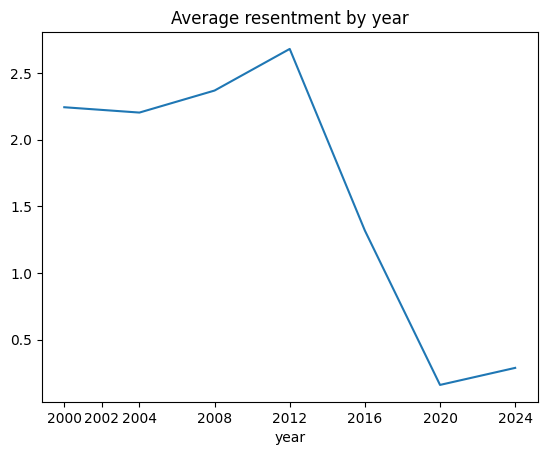

In [8]:
plot_weight_agg_over_time(whites, "resentment")

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby([time] + groupby).apply(agg, var, weight=weight).unstack().plot()


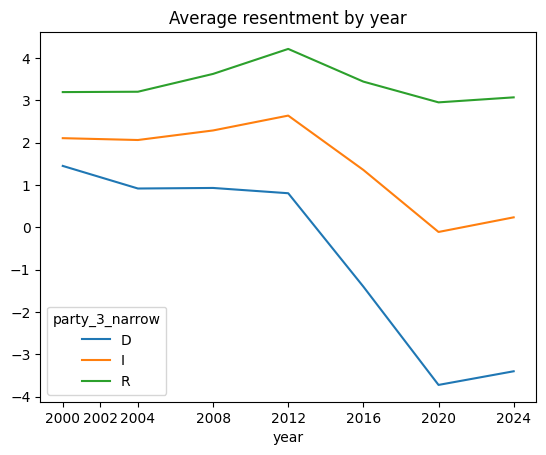

In [9]:
plot_weight_agg_over_time(whites, "resentment", groupby=["party_3_narrow"])

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby([time] + groupby).apply(agg, var, weight=weight).unstack().plot()


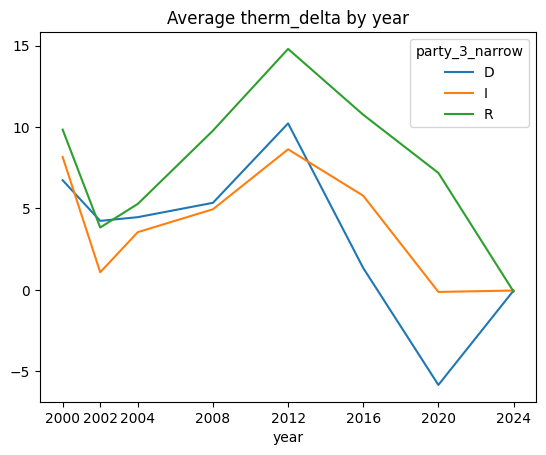

In [12]:
plot_weight_agg_over_time(whites, "therm_delta", groupby=["party_3_narrow"])

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby([time] + groupby).apply(agg, var, weight=weight).unstack().plot()


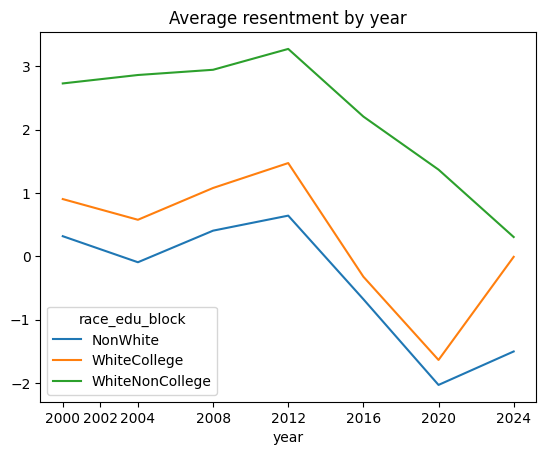

In [13]:
plot_weight_agg_over_time(data_2000, "resentment", groupby=["race_edu_block"])

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:89: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby(time).apply(agg, var, weight=weight).plot()


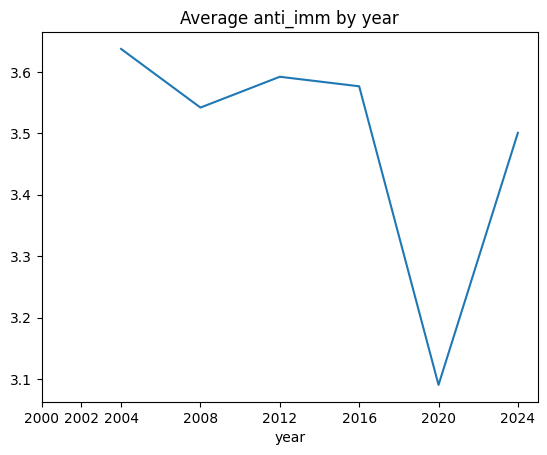

In [14]:
plot_weight_agg_over_time(whites, "anti_imm")

/home/perplexity/Documents/GitHub/python_socsci_mcp/dataset_utils.py:87: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nomiss.groupby([time] + groupby).apply(agg, var, weight=weight).unstack().plot()


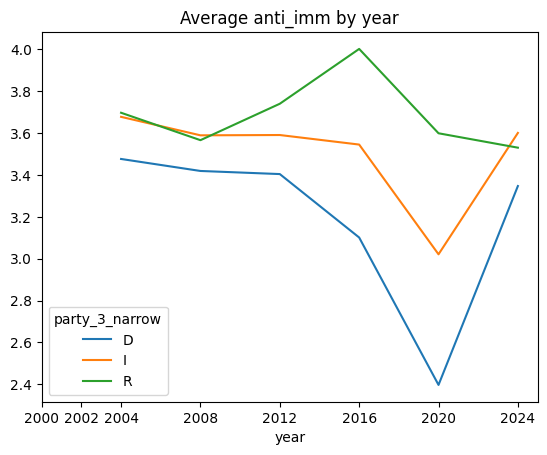

In [16]:
plot_weight_agg_over_time(whites, "anti_imm", groupby=["party_3_narrow"])